# PROJET 5 : SEGMENTEZ DES CLIENTS D'UN SITE DE E-COMMERCE (MODÉLISATIONS)

## 0 - PRÉALABLES :

### A - Importation des librairies :

In [1]:
# basics :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# statistics :
from scipy import stats as st

# preprocessing :
from sklearn.preprocessing import StandardScaler

# PCA & high dimensions visualisations :
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# clustering
from sklearn import preprocessing, decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# undersampling
from imblearn.under_sampling import RandomUnderSampler

# metrics
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer

# functions
import PCA_tools

### B - Importation des fichiers :

In [2]:
# Importation du fichier :
data = pd.read_csv("cleaned_data.csv", index_col=[0])
data.head(2)

,customer_unique_id,nbr_orders,recency,activity_period,frequency,monetary_value,average_cart,average_voucher,average_installments,average_review,canceled,clothing_shoes_&_jewelry,culture,electronics,grocery,home_&_kitchen,office,supplies_&_tools,toys_&_games,unknown_product
0,861eff4711a542e4b93843c6dd7febb0,1,520,520,1.424658,146.87,1.0,0.0,2.0,4.0,0,0,0,0,0,0,1,0,0,0
1,290c77bc529b7ac935b93aa66c333dc3,1,278,278,0.761644,335.48,1.0,0.0,8.0,5.0,0,0,0,0,0,1,0,0,0,0


### D - Préparation des données pour le clustering :

#### 1) Définitions :

In [3]:
# Définitions :
X = data.drop(columns=["customer_unique_id"])
X_RFM = data[["recency","frequency","monetary_value"]]

X_CB = data[["activity_period","nbr_orders", "average_cart","average_voucher","average_installments",
             "average_review","canceled"]]

X_prod = data[["clothing_shoes_&_jewelry","culture","electronics","grocery","home_&_kitchen","office",
               "supplies_&_tools","toys_&_games"]]

customer = data["customer_unique_id"]

#### 2) Standardisation :

In [4]:
# Standardisation :
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_RFM_scaled = scaler.fit_transform(X_RFM)
X_CB_scaled = scaler.fit_transform(X_CB)
X_prod_scaled = scaler.fit_transform(X_prod)

## I - CLUSTERING RFM :

### A - K-Means :

#### 1) Méthode du coude :

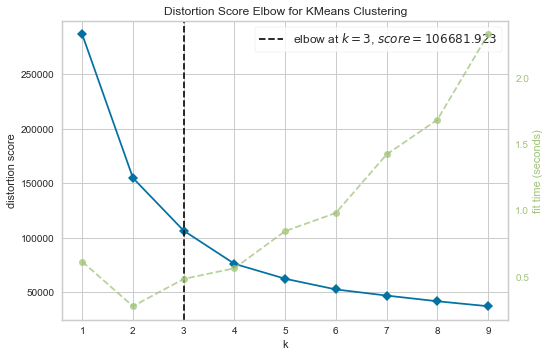

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
# Méthode du coude :
plt.figure()
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1,10))
visualizer.fit(X_RFM_scaled)
visualizer.show()

#### 2) Clustering :

In [6]:
# K-Means :
n_clust = 3
km = KMeans(n_clusters=n_clust, random_state=42)
km.fit(X_RFM_scaled)
clusters = km.labels_

### B - Visualisations :

#### 1) Calcul de la projection :

In [7]:
# PCA :
pca = decomposition.PCA().fit(X_RFM_scaled)
Z_projected = pca.transform(X_RFM_scaled)

#### 2) Éboulis des valeurs propres :

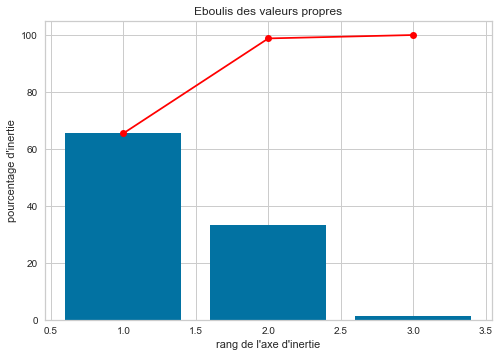

In [8]:
# Visualisation :
PCA_tools.display_scree_plot(pca)

#### 3) Cercle des corrélations :

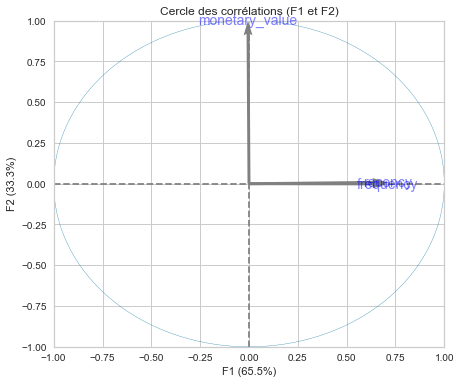

In [9]:
# Cercle des corrélations :
pcs = pca.components_
labelsVariables = data[["recency","frequency","monetary_value"]].columns
PCA_tools.display_circles(pcs, 10, pca,[(0,1)],labels = np.array(labelsVariables))

#### 4) Visualisation (ACP) :

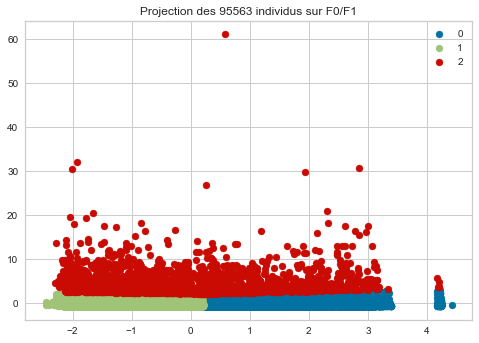

In [10]:
# Visualisation de la projection F0/F1 :
label = clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(Z_projected[label == i , 0] , Z_projected[label == i , 1] , label = i)
plt.legend(loc="upper right")
plt.title("Projection des {} individus sur F0/F1".format(Z_projected.shape[0]))
plt.show(block=False)

### C - Caractéristiques des clusters :

#### 1) Visualisation des silhouettes :

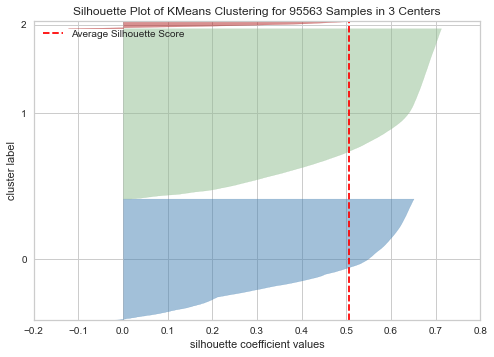

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 95563 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors=['steelblue', 'darkseagreen', 'firebrick'],
                     estimator=KMeans(n_clusters=3, random_state=42))

In [11]:
# Visualisation des silhouettes :
silhouette_visualizer(KMeans(3, random_state=42), X_RFM_scaled,
                      colors=["steelblue","darkseagreen","firebrick"])

#### 2) Attribution des numéros de clusters :

In [12]:
# Attribution des numéros de cluster :
X_RFM_c = pd.DataFrame({"customer_unique_id" : customer, "cluster":clusters})
X_RFM_c["cluster"] = X_RFM_c["cluster"].astype("object")

# Jointure :
X_RFM_c = pd.merge(data, X_RFM_c, on="customer_unique_id")

#### 3) Visualisation des distributions de variables par cluster :

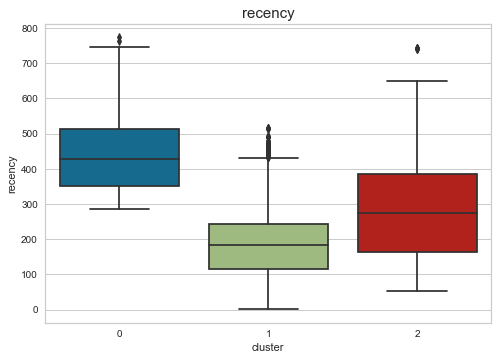

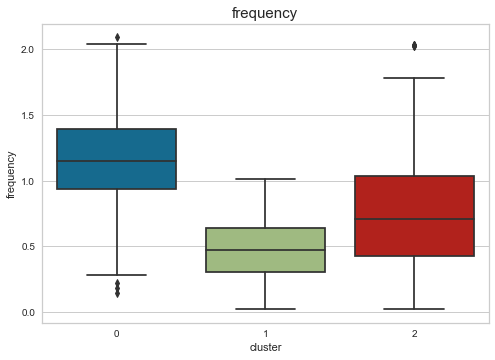

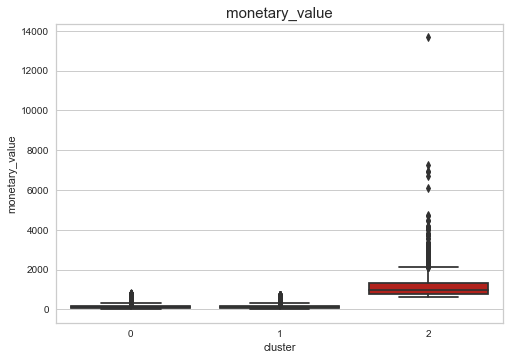

In [13]:
# Visualisation des distributions :
for c in X_RFM :
    plt.figure()
    sns.boxplot(x=X_RFM_c["cluster"],y=X_RFM_c[c])
    plt.title(f"{c}", fontsize=15)
    plt.show()

### D - Conclusion :

## II - CLUSTERING (CLIENT BEHAVIOR) :

### A - K-Means :

#### 1) Méthode du coude :

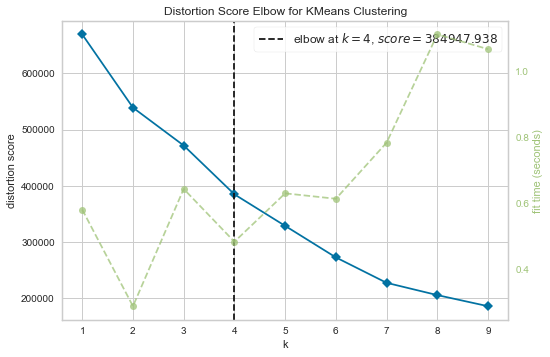

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# Méthode du coude :
plt.figure()
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1,10))
visualizer.fit(X_CB_scaled)
visualizer.show()

#### 2) Clustering :

In [15]:
# K-Means :
n_clust = 4
km = KMeans(n_clusters=n_clust, random_state=42)
km.fit(X_CB_scaled)
clusters = km.labels_

### B - Visualisations :

#### 1) Calcul de la projection :

In [16]:
# PCA :
pca = decomposition.PCA().fit(X_CB_scaled)
Z_projected = pca.transform(X_CB_scaled)

#### 2) Éboulis des valeurs propres :

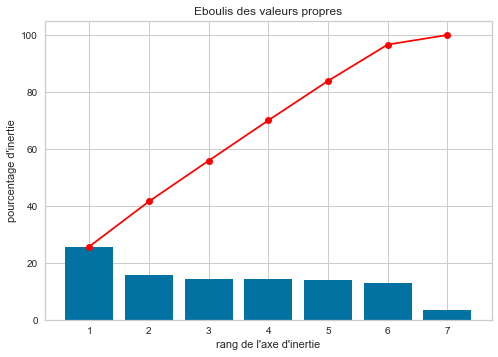

In [17]:
# Visualisation :
PCA_tools.display_scree_plot(pca)

#### 3) Cercle des corrélations :

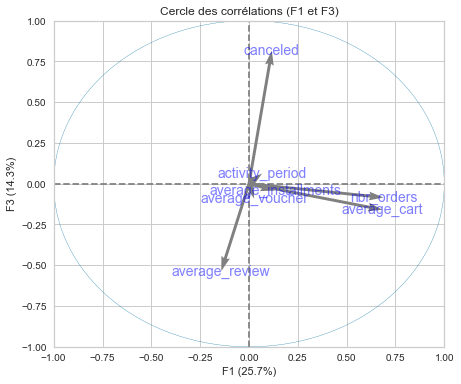

In [22]:
# Cercle des corrélations :
pcs = pca.components_
labelsVariables = data[["activity_period","nbr_orders", "average_cart","average_voucher","average_installments",
             "average_review","canceled"]].columns
PCA_tools.display_circles(pcs, 10, pca,[(0,2)],labels = np.array(labelsVariables))

#### 4) Visualisation (ACP) :

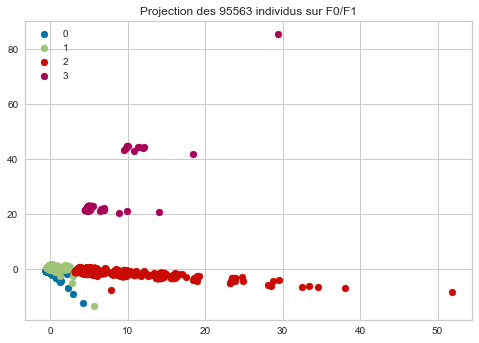

In [21]:
# Visualisation de la projection F0/F1 :
label = clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(Z_projected[label == i , 0] , Z_projected[label == i , 2] , label = i)
plt.legend(loc="upper left")
plt.title("Projection des {} individus sur F0/F1".format(Z_projected.shape[0]))
plt.show(block=False)

### C - Caractéristiques des clusters :

#### 1) Visualisation des silhouettes :

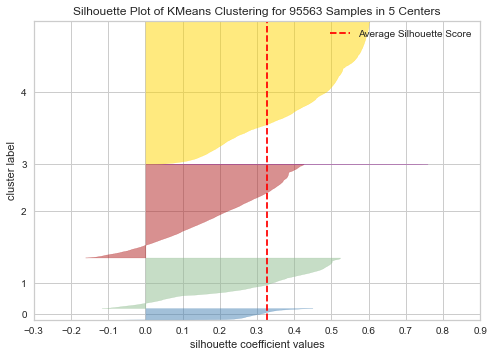

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 95563 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors=['steelblue', 'darkseagreen', 'firebrick',
                             'darkmagenta', 'gold', 'paleturquoise'],
                     estimator=KMeans(n_clusters=5, random_state=42))

In [24]:
# Visualisation des silhouettes :
silhouette_visualizer(KMeans(5, random_state=42), X_CB_scaled,
                      colors=["steelblue","darkseagreen","firebrick","darkmagenta","gold","paleturquoise"])

#### 2) Attribution des numéros de clusters :

In [25]:
# Attribution des numéros de cluster :
X_CB_c = pd.DataFrame({"customer_unique_id" : customer, "cluster":clusters})
X_CB_c["cluster"] = X_CB_c["cluster"].astype("object")

# Jointure :
X_CB_c = pd.merge(data, X_CB_c, on="customer_unique_id")

#### 3) Visualisation des distributions de variables par cluster :

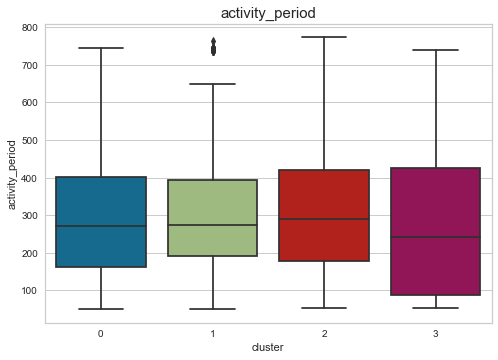

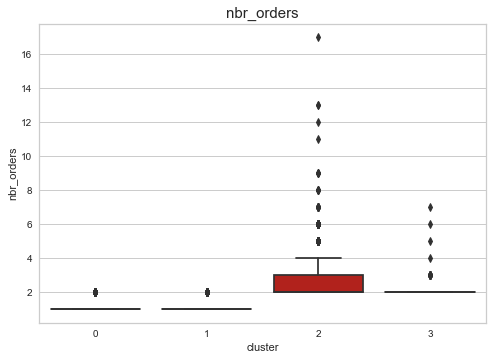

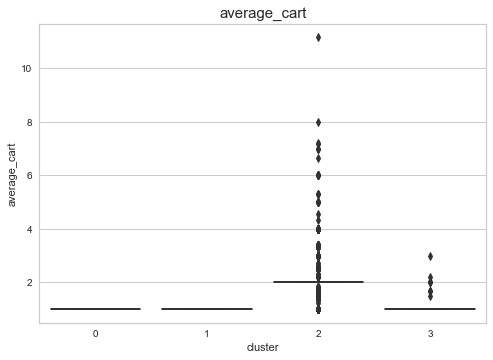

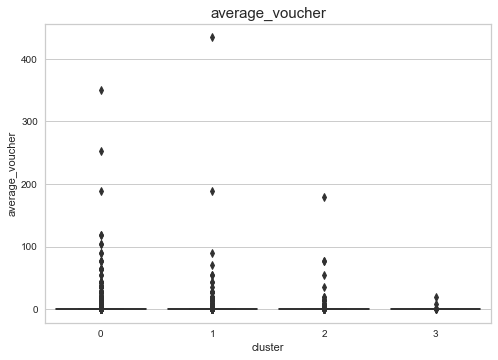

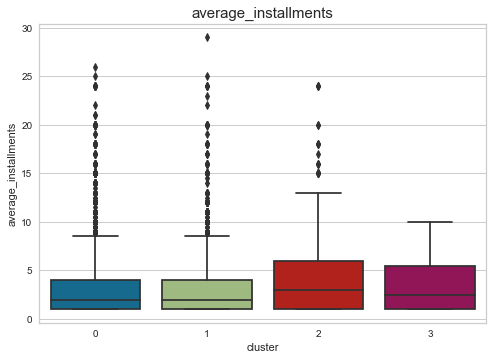

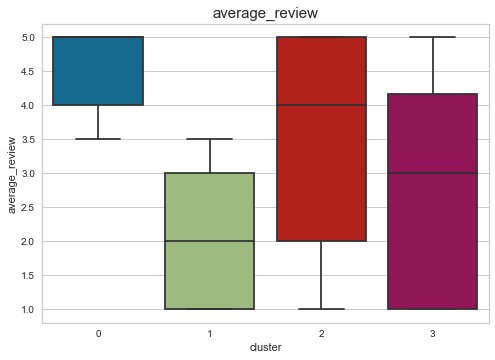

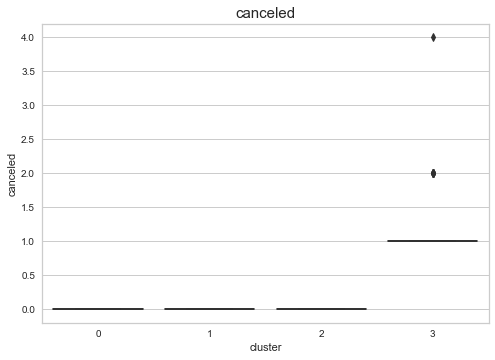

In [26]:
# Visualisation des distributions :
for c in X_CB :
    plt.figure()
    sns.boxplot(x=X_CB_c["cluster"],y=X_CB_c[c])
    plt.title(f"{c}", fontsize=15)
    plt.show()

### D) Conclusion :

## III - CLUSTERING (PRODUCTS) :

### A - K-Means :

#### 1) Méthode du coude :

C:\Users\7700k\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\7700k\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


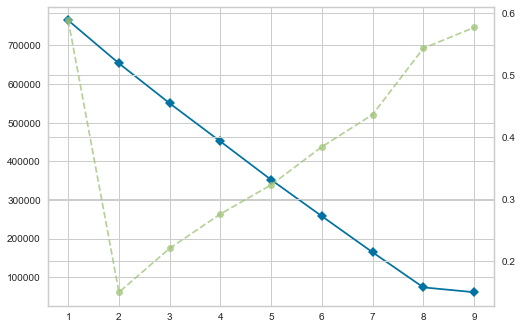

In [27]:
# Méthode du coude :
plt.figure()
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1,10))
visualizer.fit(X_prod_scaled)
plt.show()

#### 2) Clustering :

In [28]:
# K-Means :
n_clust = 3
km = KMeans(n_clusters=n_clust, random_state=42)
km.fit(X_prod_scaled)
clusters = km.labels_

### B - Visualisations :

#### 1) Calcul de la projection :

In [29]:
# PCA :
pca = decomposition.PCA().fit(X_prod_scaled)
Z_projected = pca.transform(X_prod_scaled)

#### 2) Éboulis des valeurs propres :

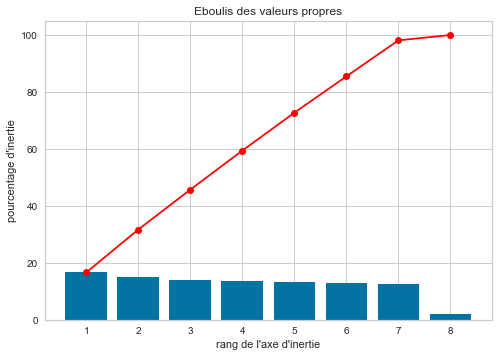

In [30]:
# Visualisation :
PCA_tools.display_scree_plot(pca)

#### 3) Cercle des corrélations :

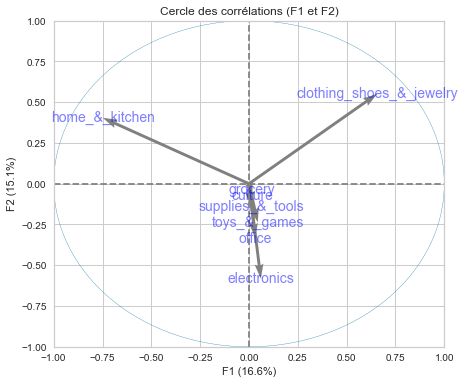

In [31]:
# Cercle des corrélations :
pcs = pca.components_
labelsVariables = data[["clothing_shoes_&_jewelry","culture","electronics","grocery","home_&_kitchen","office",
               "supplies_&_tools","toys_&_games"]].columns
PCA_tools.display_circles(pcs, 10, pca,[(0,1)],labels = np.array(labelsVariables))

#### 4) Visualisation (ACP) :

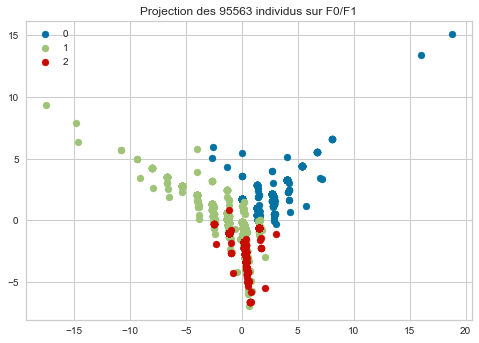

In [32]:
# Visualisation de la projection F0/F1 :
label = clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(Z_projected[label == i , 0] , Z_projected[label == i , 1] , label = i)
plt.legend(loc="upper left")
plt.title("Projection des {} individus sur F0/F1".format(Z_projected.shape[0]))
plt.show(block=False)

### C - Caractéristiques des clusters :

#### 1) Visualisation des silhouettes :

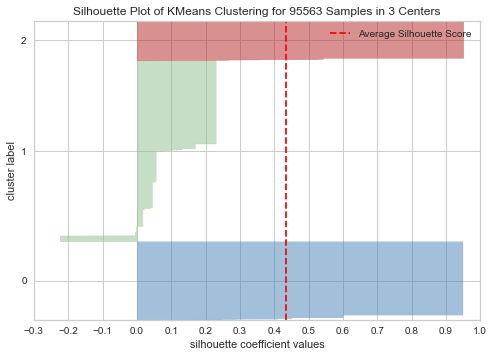

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 95563 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors=['steelblue', 'darkseagreen', 'firebrick'],
                     estimator=KMeans(n_clusters=3, random_state=42))

In [33]:
# Visualisation des silhouettes :
silhouette_visualizer(KMeans(3, random_state=42), X_prod_scaled,
                      colors=["steelblue","darkseagreen","firebrick"])

#### 2) Attribution des numéros de clusters :

In [34]:
# Attribution des numéros de cluster :
X_prod_c = pd.DataFrame({"customer_unique_id" : customer, "cluster":clusters})
X_prod_c["cluster"] = X_prod_c["cluster"].astype("object")

# Jointure :
X_prod_c = pd.merge(data, X_prod_c, on="customer_unique_id")

#### 3) Visualisation des distributions de variables par cluster :

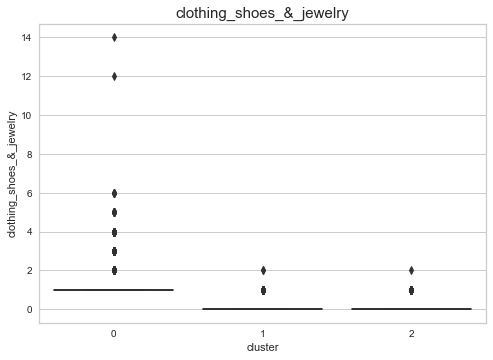

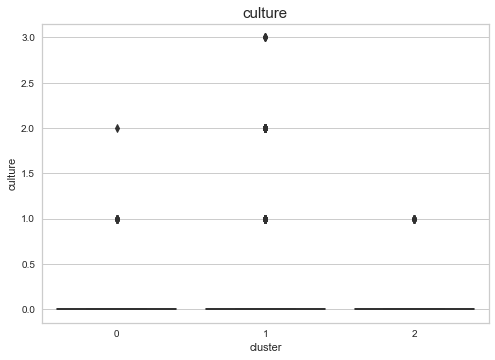

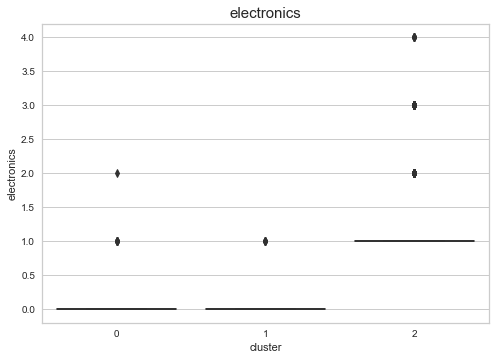

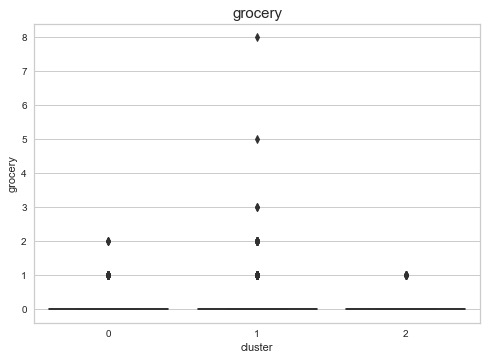

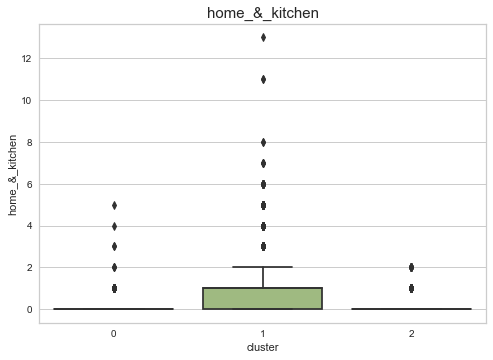

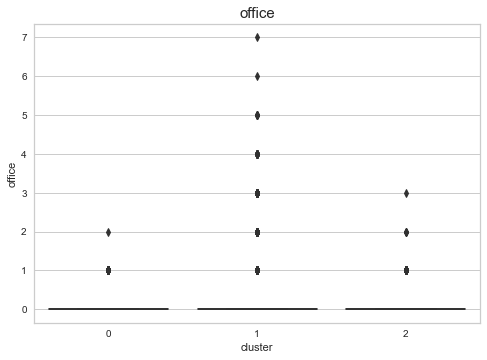

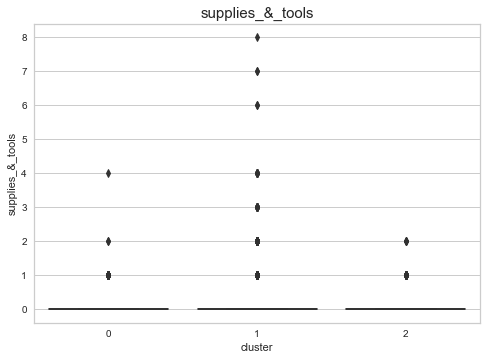

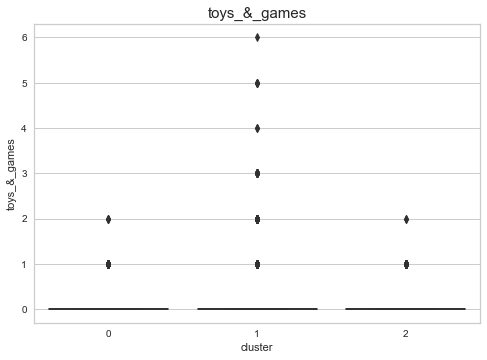

In [35]:
# Visualisation des distributions :
for c in X_prod :
    plt.figure()
    sns.boxplot(x=X_prod_c["cluster"],y=X_prod_c[c])
    plt.title(f"{c}", fontsize=15)
    plt.show()

### D - Conclusion :

## IV) CLUSTERING (FEATURES SELECTION) :

### A - Sélection des variables :

#### 1) Définition :

In [36]:
# Définition :
X_fs = data[["frequency","monetary_value","average_cart","average_installments","average_review"]]

#### 2) Standardisation :

In [37]:
# Standardisation :
X_fs_scaled = scaler.fit_transform(X_fs)

### B - K-Means :

#### 1) Méthode du coude :

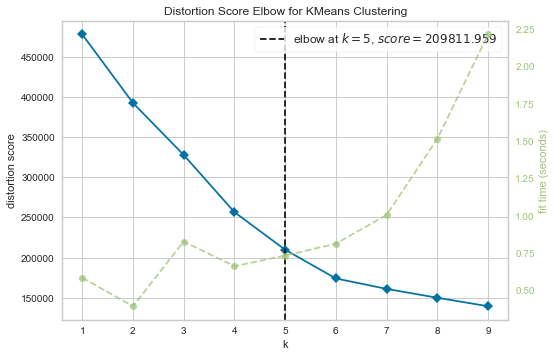

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
# Méthode du coude :
plt.figure()
visualizer = KElbowVisualizer(KMeans(), k=(1,10))
visualizer.fit(X_fs_scaled)
visualizer.show()

#### 2) Clustering :

In [39]:
# K-Means :
n_clust = 5
km = KMeans(n_clusters=n_clust, random_state=42)
km.fit(X_fs_scaled)
clusters = km.labels_

### C - Visualisation :

#### 1) Calcul de la projection :

In [40]:
# PCA :
pca = decomposition.PCA().fit(X_fs_scaled)
Z_projected = pca.transform(X_fs_scaled)

#### 2) Éboulis des valeurs propres :

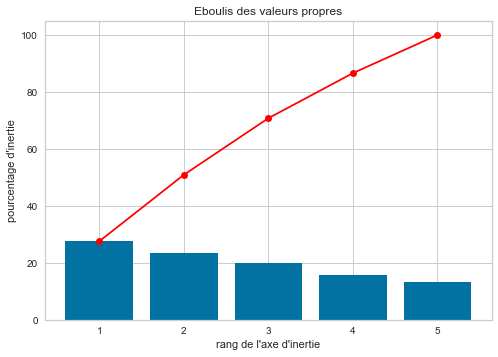

In [41]:
# Visualisation :
PCA_tools.display_scree_plot(pca)

#### 3) Cercles des corrélations :

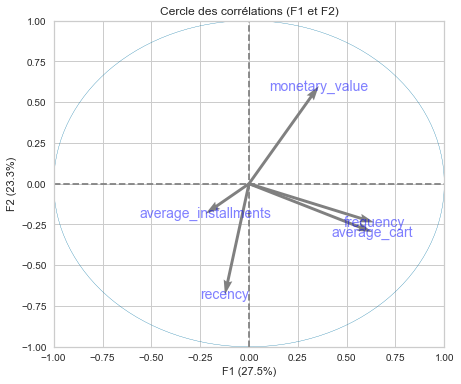

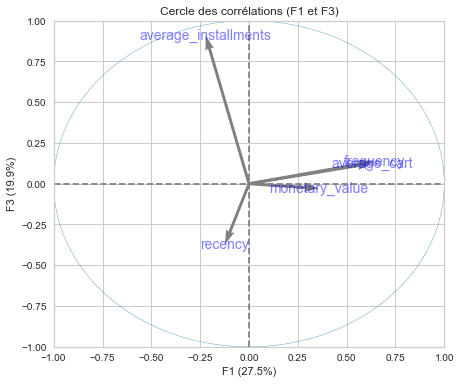

In [42]:
# Cercle des corrélations :
pcs = pca.components_
labelsVariables = data[["recency","frequency","monetary_value","average_cart","average_installments","average_review"]].columns
PCA_tools.display_circles(pcs, 10, pca,[(0,1),(0,2)],labels = np.array(labelsVariables))

#### 4) Visualisation (ACP) :

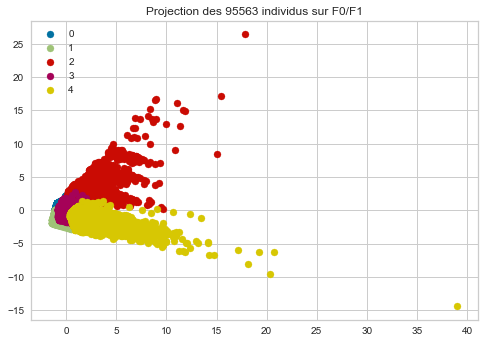

In [43]:
# Visualisation de la projection F0/F1 :
label = clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(Z_projected[label == i , 0] , Z_projected[label == i , 1] , label = i)
plt.legend(loc="upper left")
plt.title("Projection des {} individus sur F0/F1".format(Z_projected.shape[0]))
plt.show(block=False)

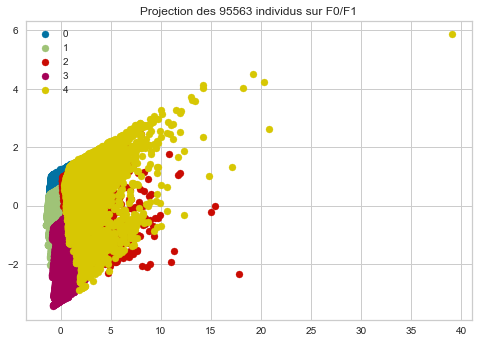

In [44]:
# Visualisation de la projection F0/F2 :
label = clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(Z_projected[label == i , 0] , Z_projected[label == i , 2] , label = i)
plt.legend(loc="upper left")
plt.title("Projection des {} individus sur F0/F1".format(Z_projected.shape[0]))
plt.show(block=False)

### D - Caractéristiques des clusters :

#### 1) Visualisation des silhouettes :

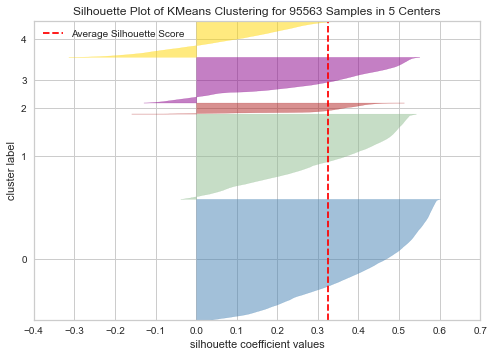

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 95563 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors=['steelblue', 'darkseagreen', 'firebrick',
                             'darkmagenta', 'gold'],
                     estimator=KMeans(n_clusters=5, random_state=42))

In [45]:
# Visualisation des silhouettes :
silhouette_visualizer(KMeans(5, random_state=42), X_fs_scaled, 
                      colors=["steelblue","darkseagreen","firebrick","darkmagenta","gold"])

#### 2) Attribution des numéros de clusters :

In [46]:
# Attribution des numéros de cluster :
X_fs_c = pd.DataFrame({"customer_unique_id" : customer, "cluster":clusters})
X_fs_c["cluster"] = X_fs_c["cluster"].astype("object")

# Jointure :
X_fs_c = pd.merge(data, X_fs_c, on="customer_unique_id")

#### 3) Nombre de clients par clusters :

In [47]:
# Nombre de clients par cluster :
X_fs_c["cluster"].value_counts()

0    38672
1    27255
3    14602
4    11506
2     3528
Name: cluster, dtype: int64

#### 4) Visualisation des distributions de variables par cluster (boxplot) :

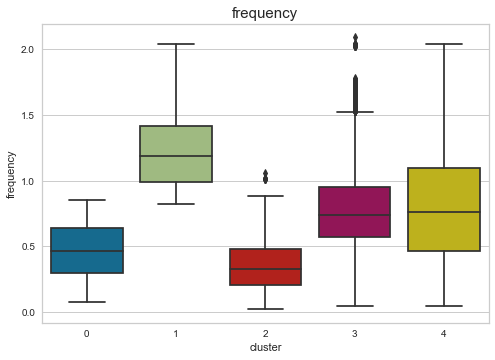

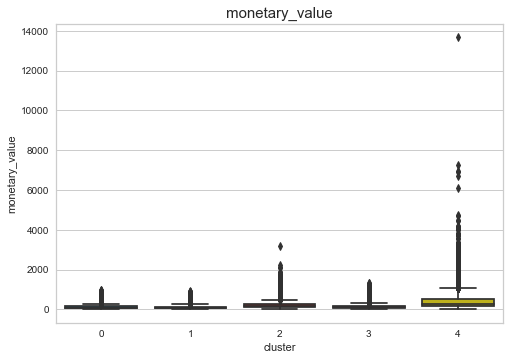

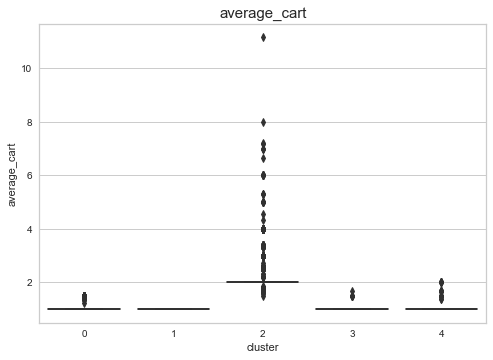

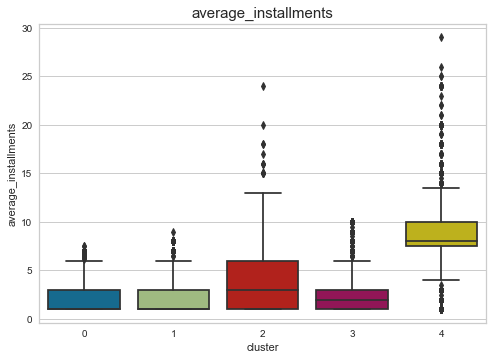

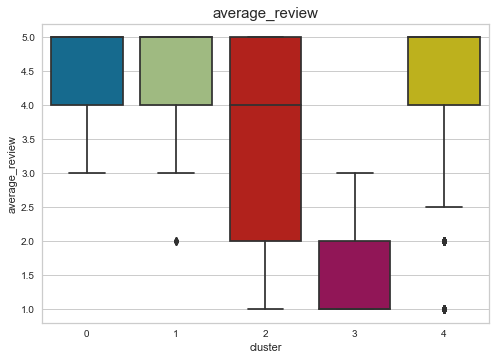

In [48]:
# Visualisation des distributions :
for c in X_fs :
    plt.figure()
    sns.boxplot(x=X_fs_c["cluster"],y=X_fs_c[c])
    plt.title(f"{c}", fontsize=15)
    plt.show()

### E - Conclusion :

## V - CLUSTERING (UNDERSAMPLING)

### A - Préprocessing :

#### 1) Undersampling :

In [49]:
# Undersampling :
undersample = RandomUnderSampler(sampling_strategy = 1, random_state=42)
data_resampled, y_resampled = undersample.fit_resample(data, X["nbr_orders"]>1)
customer_resampled = data_resampled["customer_unique_id"]

In [50]:
# Vérification du ratio :
y_resampled.value_counts()

False    5948
True     5948
Name: nbr_orders, dtype: int64

#### 2) Choix des variables :

In [51]:
# Choix des variables :
X_resampled = data_resampled[["frequency","monetary_value","average_installments","average_review","average_cart"]]

#### 3) Standardisation :

In [52]:
# Standardisation :
X_resampled_scaled = scaler.fit_transform(X_resampled)

### B - K-Means :

#### 1) Méthode du coude :

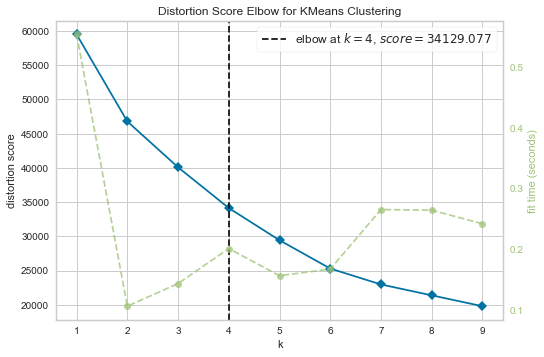

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
# Méthode du coude :
plt.figure()
visualizer = KElbowVisualizer(KMeans(), k=(1,10))
visualizer.fit(X_resampled_scaled)
visualizer.show()

#### 2) Clustering :

In [96]:
# K-Means :
n_clust = 6
km = KMeans(n_clusters=n_clust, random_state=42)
km.fit(X_resampled_scaled)
clusters = km.labels_

### C - Visualisations

#### 1) Calcul des projections :

In [97]:
# PCA :
pca = decomposition.PCA().fit(X_resampled_scaled)
Z_projected = pca.transform(X_resampled_scaled)

In [98]:
# TSNE :
tsne = TSNE(perplexity=15)
Z_TSNE = tsne.fit_transform(X_resampled_scaled)

C:\Users\7700k\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\7700k\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


#### 2) Éboulis des valeurs propres :

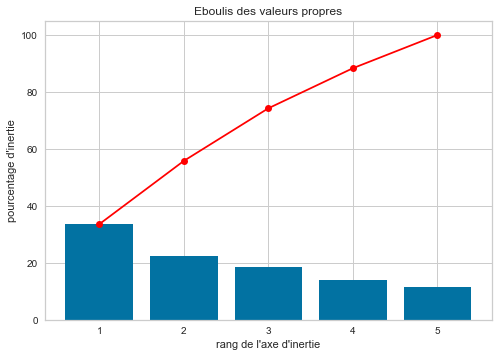

In [99]:
# Visualisation :
PCA_tools.display_scree_plot(pca)

#### 3) Cercle des corrélations :

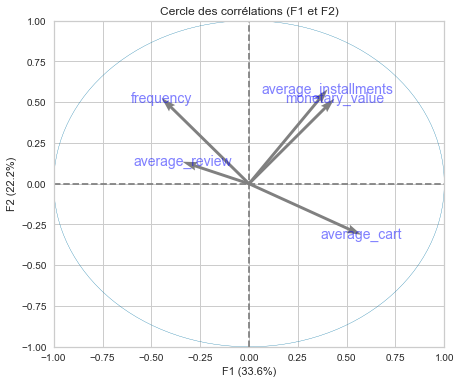

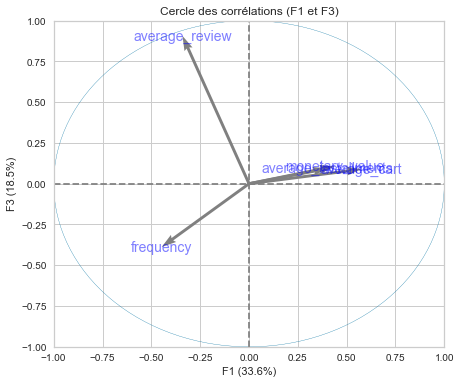

In [100]:
# Cercle des corrélations :
pcs = pca.components_
PCA_tools.display_circles(pcs, 5, pca,[(0,1),(0,2)],labels = np.array(X_resampled.columns))

#### 4) Visualisation (ACP) :

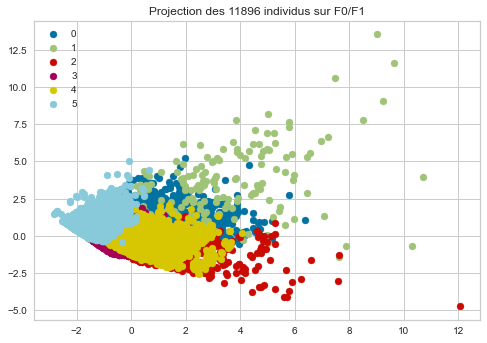

In [101]:
# Visualisation de la projection F0/F1 :
label = clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(Z_projected[label == i , 0] , Z_projected[label == i , 1] , label = i)
plt.legend(loc="upper left")
plt.title("Projection des {} individus sur F0/F1".format(Z_projected.shape[0]))
plt.show(block=False)

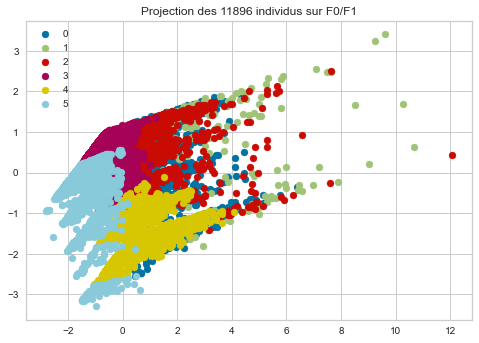

In [102]:
# Visualisation de la projection F0/F2 :
label = clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(Z_projected[label == i , 0] , Z_projected[label == i , 2] , label = i)
plt.legend(loc="upper left")
plt.title("Projection des {} individus sur F0/F1".format(Z_projected.shape[0]))
plt.show(block=False)

#### 5) Visualisation (TSNE) :

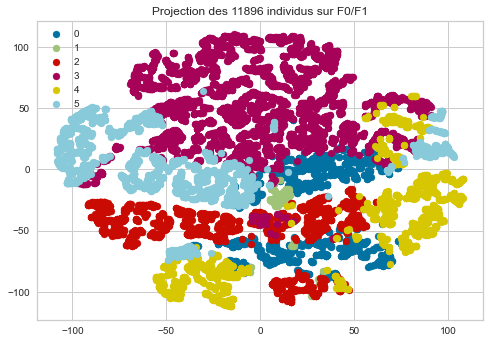

In [103]:
# Visualisation de la projection F0/F2 :
label = clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(Z_TSNE[label == i , 0] , Z_TSNE[label == i , 1] , label = i)
plt.legend(loc="upper left")
plt.title("Projection des {} individus sur F0/F1".format(Z_TSNE.shape[0]))
plt.show(block=False)

### D - Caractéristiques des clusters :

#### 1) Visualisation des silhouettes :

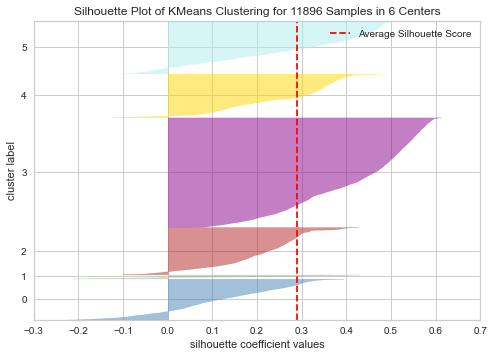

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 11896 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors=['steelblue', 'darkseagreen', 'firebrick',
                             'darkmagenta', 'gold', 'paleturquoise'],
                     estimator=KMeans(n_clusters=6, random_state=42))

In [104]:
# Visualisation des silhouettes :
silhouette_visualizer(KMeans(6, random_state=42), X_resampled_scaled, 
                      colors=["steelblue","darkseagreen","firebrick","darkmagenta","gold","paleturquoise"])

#### 2) Attribution des numéros de cluster :

In [105]:
# Attribution des numéros de cluster :
X_resampled_c = pd.DataFrame({"customer_unique_id" : customer_resampled, "cluster":clusters})
X_resampled_c["cluster"] = X_resampled_c["cluster"].astype("object")

# Jointure :
X_resampled_c = pd.merge(data_resampled, X_resampled_c, on="customer_unique_id")

#### 3) Nombre de clients par clusters :

In [106]:
# Nombre de clients par cluster :
X_resampled_c["cluster"].value_counts()

3    4378
5    2094
2    1889
4    1741
0    1635
1     159
Name: cluster, dtype: int64

#### 4) Visualisation des distributions de variables par cluster (boxplot) :

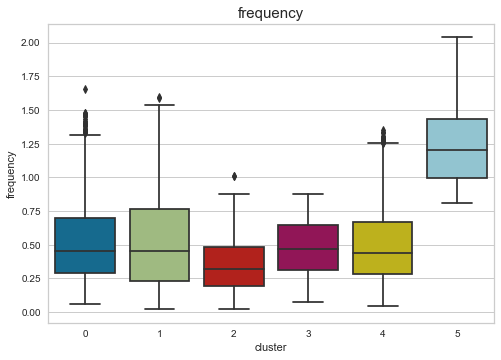

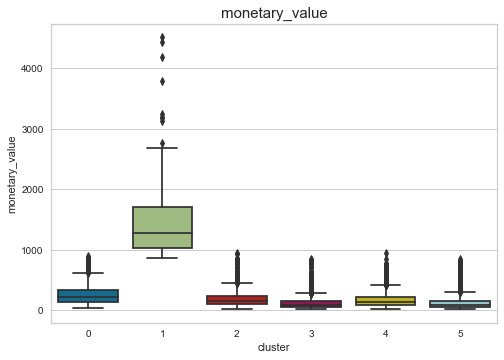

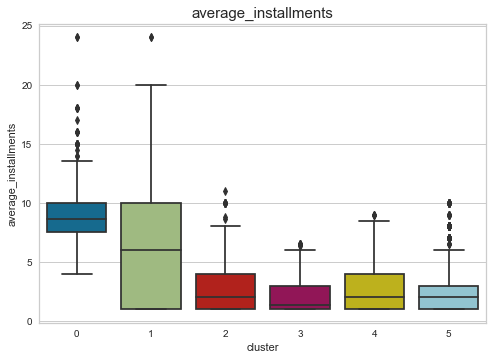

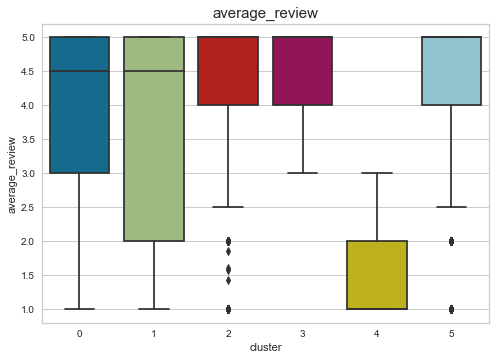

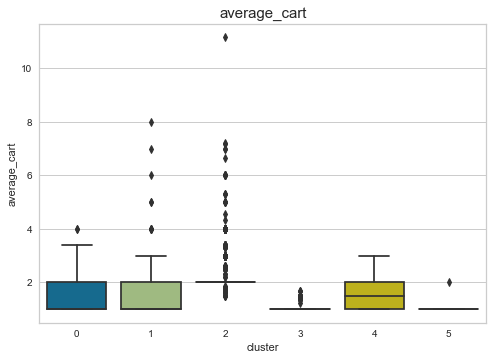

In [107]:
# Visualisation des distributions :
for c in X_resampled :
    plt.figure()
    sns.boxplot(x=X_resampled_c["cluster"],y=X_resampled_c[c])
    plt.title(f"{c}", fontsize=15)
    plt.show()

#### 5) Visualisation des distributions de variables par cluster (kdeplot) :

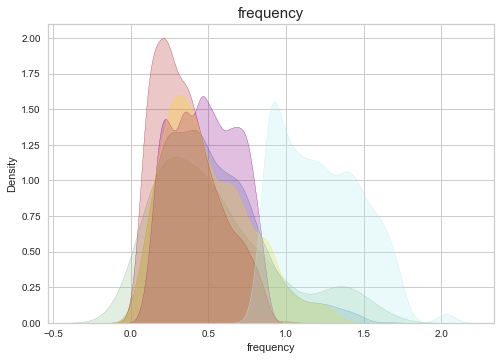

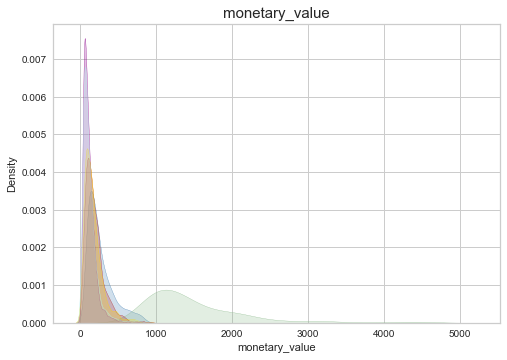

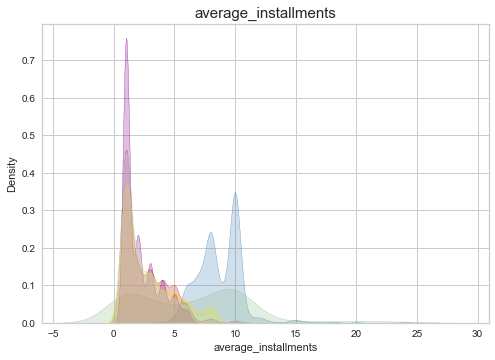

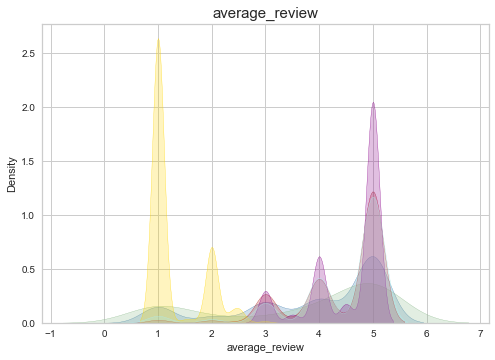

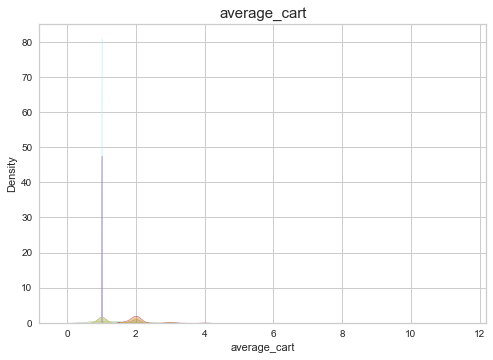

In [108]:
# Visualisation :
for c in X_resampled :
    plt.figure()
    sns.kdeplot(X_resampled_c[X_resampled_c["cluster"]==0][c], shade=True,color="steelblue", label="cluster 0")
    sns.kdeplot(X_resampled_c[X_resampled_c["cluster"]==1][c], shade=True,color="darkseagreen", label="cluster 1")
    sns.kdeplot(X_resampled_c[X_resampled_c["cluster"]==2][c], shade=True,color="firebrick", label="cluster 2")
    sns.kdeplot(X_resampled_c[X_resampled_c["cluster"]==3][c], shade=True,color="darkmagenta", label="cluster 2")
    sns.kdeplot(X_resampled_c[X_resampled_c["cluster"]==4][c], shade=True,color="gold", label="cluster 2")
    sns.kdeplot(X_resampled_c[X_resampled_c["cluster"]==5][c], shade=True,color="paleturquoise", label="cluster 2")
    plt.title(f"{c}", fontsize=15)
    plt.show()

#### 6) Tests statistiques :

In [115]:
# Test des variances (Bartlett) :
st.bartlett(X_resampled_c[X_resampled_c["cluster"]==0][c],
            X_resampled_c[X_resampled_c["cluster"]==1][c],
            X_resampled_c[X_resampled_c["cluster"]==2][c],
            X_resampled_c[X_resampled_c["cluster"]==3][c],
            X_resampled_c[X_resampled_c["cluster"]==4][c],
            X_resampled_c[X_resampled_c["cluster"]==5][c])

BartlettResult(statistic=27891.992234785095, pvalue=0.0)

In [114]:
# Test des moyennes (F-Statistic) :
st.f_oneway(X_resampled_c[X_resampled_c["cluster"]==0][c],
            X_resampled_c[X_resampled_c["cluster"]==1][c],
            X_resampled_c[X_resampled_c["cluster"]==2][c],
            X_resampled_c[X_resampled_c["cluster"]==3][c],
            X_resampled_c[X_resampled_c["cluster"]==4][c],
            X_resampled_c[X_resampled_c["cluster"]==5][c])

F_onewayResult(statistic=2485.3652006813954, pvalue=0.0)

In [112]:
# Test des médianes (Kruskal-Wallis) :
st.kruskal(X_resampled_c[X_resampled_c["cluster"]==0][c],
           X_resampled_c[X_resampled_c["cluster"]==1][c],
           X_resampled_c[X_resampled_c["cluster"]==2][c],
           X_resampled_c[X_resampled_c["cluster"]==3][c],
           X_resampled_c[X_resampled_c["cluster"]==4][c],
           X_resampled_c[X_resampled_c["cluster"]==5][c])

KruskalResult(statistic=7538.628906616507, pvalue=0.0)

### E - Conclusion :

#### 1) Cluster 0 : les clients aux ressources limitées :

#### 2) Cluster 1 : les clients qui achètent des produits de grande valeur.

#### 3) Cluster 2 : les clients de passage

#### 4) Cluster 3 : les clients économes

#### 5) Cluster 4 : les clients mécontents

#### 6) Cluster 5 : les clients qui achètent très souvent un seul produit